In [1]:
import os
import numpy as np

In [2]:
au2eV = 27.2114079527
db_name = "octane"
energy_qm = np.load(f"{db_name}_evaluate_answer.npy", allow_pickle=True)
energy_nnp = np.load(f"{db_name}_evaluate_prediction.npy", allow_pickle=True)

energy_qm *= au2eV
energy_nnp *= au2eV

[[-315.18557739 -314.86044312 -314.84356689]
 [-315.19390869 -314.855896   -314.84576416]
 [-315.15881348 -314.84115601 -314.83483887]
 [-315.13317871 -314.81784058 -314.80917358]
 [-315.16778564 -314.85977173 -314.84658813]
 [-315.1388855  -314.81008911 -314.8052063 ]
 [-315.2194519  -314.86697388 -314.86126709]
 [-315.19433594 -314.85534668 -314.84014893]
 [-315.21066284 -314.88150024 -314.86410522]
 [-315.20925903 -314.859375   -314.85565186]
 [-315.2276001  -314.89199829 -314.87771606]
 [-315.23391724 -314.88677979 -314.8767395 ]
 [-315.20925903 -314.87347412 -314.87207031]
 [-315.19622803 -314.86419678 -314.85760498]
 [-315.21435547 -314.894104   -314.88018799]
 [-315.19561768 -314.85287476 -314.8480835 ]
 [-315.24945068 -314.89004517 -314.88772583]
 [-315.23287964 -314.88543701 -314.87155151]
 [-315.24404907 -314.9045105  -314.88739014]
 [-315.24285889 -314.8861084  -314.88208008]
 [-315.24853516 -314.9074707  -314.894104  ]
 [-315.25350952 -314.90185547 -314.89187622]
 [-315.234

R2:0.998
R2:0.969


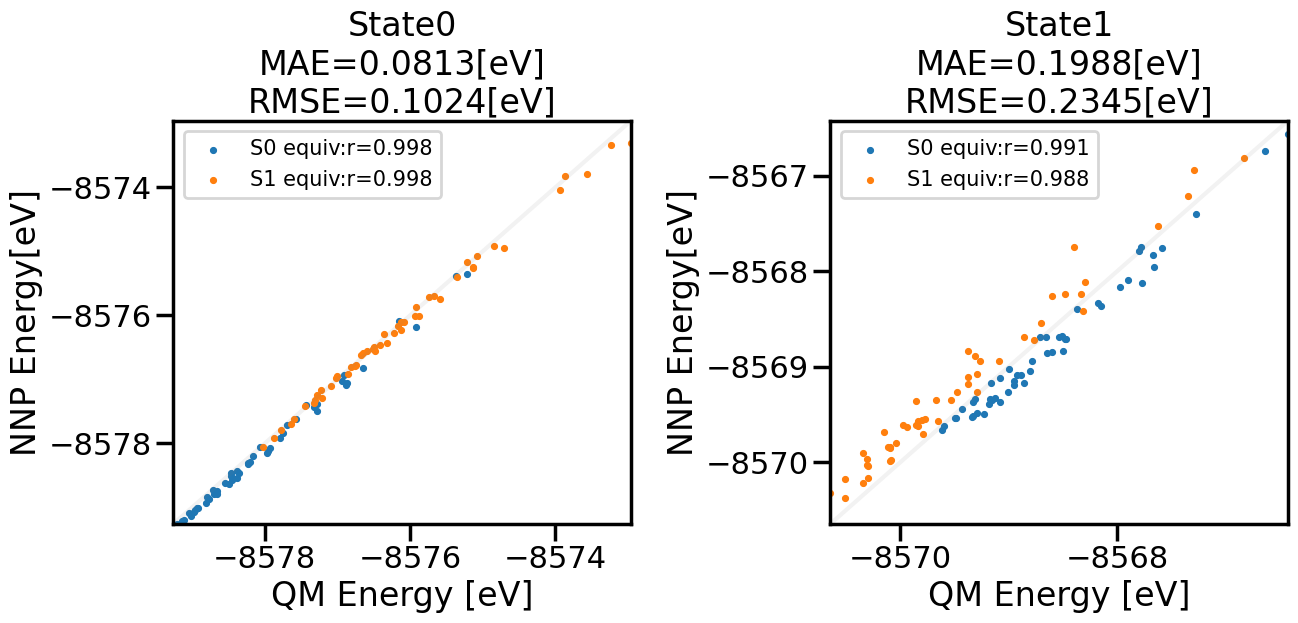

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

import seaborn as sns

sns.set_context("poster")
plt.rcParams["grid.linewidth"] = 0.8

au2eV = 27.2114079527

ncol = 2
nrow = 1
fig, axes = plt.subplots(figsize=(6.75 * ncol, 6.75 * nrow), ncols=ncol, nrows=nrow)

nstate = 2
num_atom = 23
for i in range(nstate):
    ax = axes[i]
    r2, p = pearsonr(energy_qm[:, i][:50], energy_nnp[:, i][:50])
    label = f"S0 equiv:r={r2:.3f}"
    ax.scatter(energy_qm[:, i][:50], energy_nnp[:, i][:50], s=10, label=label)
    r2, p = pearsonr(energy_qm[:, i][50:], energy_nnp[:, i][50:])
    label = f"S1 equiv:r={r2:.3f}"
    # total
    r2, p = pearsonr(energy_qm[:, i], energy_nnp[:, i])
    print(f"R2:{r2:.3f}")
    ax.scatter(energy_qm[:, i][50:], energy_nnp[:, i][50:], s=10, label=label)
    energy_mae = mean_absolute_error(energy_qm[:, i], energy_nnp[:, i])
    energy_rmse = mean_squared_error(energy_qm[:, i], energy_nnp[:, i], squared=False)
    ax.set_title(f"State{i}\nMAE={energy_mae:.4f}[eV]\nRMSE={energy_rmse:.4f}[eV]")
    ax.legend(fontsize=15)

for i in range(nstate):
    ax = axes[i]
    min_e = min([min(energy_qm[:, i]), min(energy_nnp[:, i])])
    max_e = max([max(energy_qm[:, i]), max(energy_nnp[:, i])])
    ax.set_xlim(min_e, max_e)
    ax.set_ylim(min_e, max_e)
    x = np.linspace(min_e, max_e, 1000)
    ax.plot(x, x, linestyle="solid", color="gray", alpha=0.1)
    ax.set_xlabel("QM Energy [eV]")
    ax.set_ylabel("NNP Energy[eV]")

plt.tight_layout()
plt.show()

R2:0.998
R2:0.991


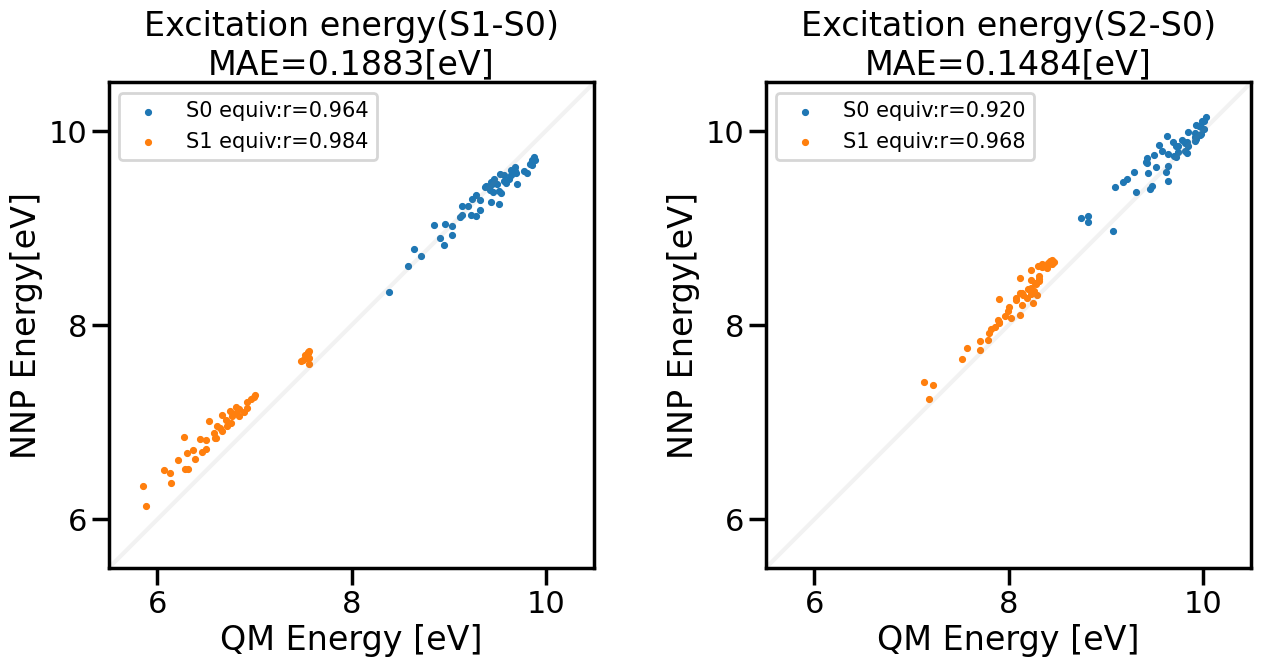

In [5]:
sns.set_context("poster")
plt.rcParams["grid.linewidth"] = 0.8

au2eV = 27.2114079527

ncol = 2
nrow = 1
fig, axes = plt.subplots(figsize=(6.75 * ncol, 6.75 * nrow), ncols=ncol, nrows=nrow)

nstate = 2
num_atom = 23
for i in range(nstate):
    ax = axes[i]
    diff_qm = energy_qm[:, i + 1] - energy_qm[:, 0]
    diff_nnp = energy_nnp[:, i + 1] - energy_nnp[:, 0]
    r2, p = pearsonr(diff_qm[:50], diff_nnp[:50])
    label = f"S0 equiv:r={r2:.3f}"
    ax.scatter(diff_qm[:50], diff_nnp[:50], s=10, label=label)
    r2, p = pearsonr(diff_qm[50:], diff_nnp[50:])
    label = f"S1 equiv:r={r2:.3f}"
    ax.scatter(diff_qm[50:], diff_nnp[50:], s=10, label=label)
    # total
    r2, p = pearsonr(diff_qm, diff_nnp)
    print(f"R2:{r2:.3f}")

    energy_mae = mean_absolute_error(diff_qm, diff_nnp)
    energy_rmse = mean_squared_error(diff_qm, diff_nnp, squared=False)
    ax.set_title(f"Excitation energy(S{i+1}-S{0})\nMAE={energy_mae:.4f}[eV]")
    ax.legend(fontsize=15)
    min_e = min([min(diff_qm), min(diff_nnp)])
    max_e = max([max(diff_nnp), max(diff_qm)])
    min_e = 5.5
    max_e = 10.5
    x = np.linspace(min_e, max_e, 1000)

    ax.plot(x, x, linestyle="solid", color="gray", alpha=0.1)
    ax.set_xlabel("QM Energy [eV]")
    ax.set_ylabel("NNP Energy[eV]")
    ax.set_xticks([2, 4, 6, 8, 10])
    ax.set_yticks([2, 4, 6, 8, 10])
    ax.set_xlim(min_e, max_e)
    ax.set_ylim(min_e, max_e)
    ax.set_aspect("equal")
plt.tight_layout()
plt.show()